In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('data/pieman_data/*.nii')

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files, num_factors=10)

In [6]:
prior_sample, _ = htfa.sample(posterior_predictive=False)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

prior_sample

03/28/2018 11:32:10 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.34312695e+03
03/28/2018 11:32:10 Prior Reconstruction Error (Frobenius Norm) for subject 1: 5.37771436e+03
03/28/2018 11:32:10 Prior Reconstruction Error (Frobenius Norm) for subject 2: 5.52487451e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 10]), 'voxel_noise': Normal([torch.FloatTensor of size 3]), 'subject_weights_mu': Normal([torch.FloatTensor of size 3x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 3x10]), 'Weights0': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 10]), 'Weights1': Normal([torch.FloatTensor of size 300

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


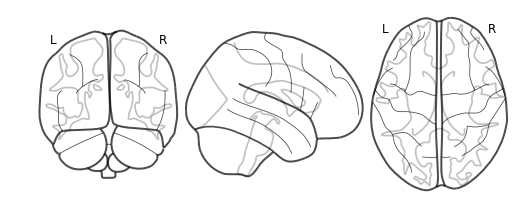

In [7]:
htfa.plot_factor_centers(trace=prior_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


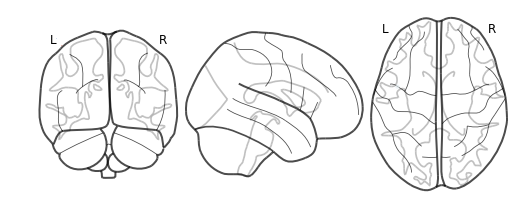

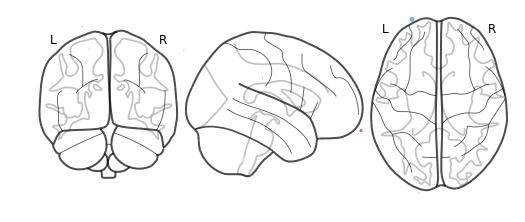

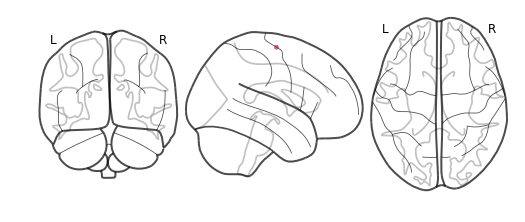

In [8]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=prior_sample)

In [9]:
del prior_sample

In [10]:
variational_sample, _ = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            variational_sample['Y%d' % s].value.data.cpu().numpy() -
            htfa.voxel_activations[s].numpy()
        )
    )

variational_sample

03/28/2018 11:32:17 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.34340430e+03
03/28/2018 11:32:17 Prior Reconstruction Error (Frobenius Norm) for subject 1: 5.37757861e+03
03/28/2018 11:32:17 Prior Reconstruction Error (Frobenius Norm) for subject 2: 5.52480664e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x3x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x3x10]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Weights1': Normal([t

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


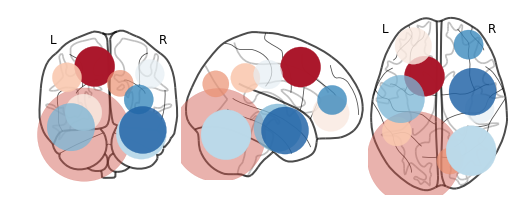

In [11]:
htfa.plot_factor_centers(trace=variational_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


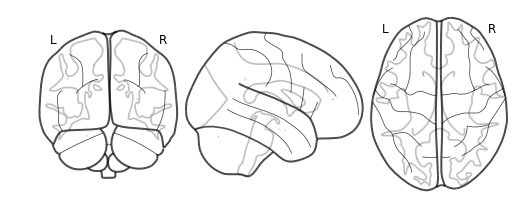

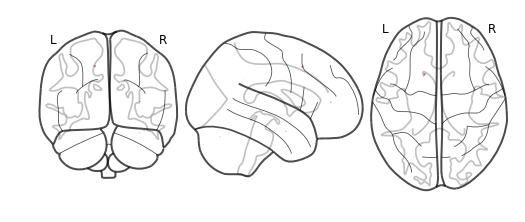

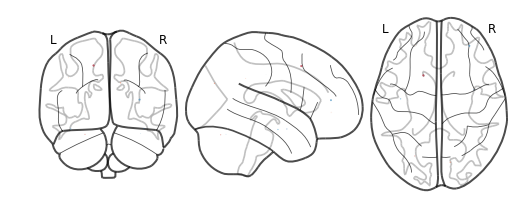

In [12]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=variational_sample)

In [13]:
del variational_sample

In [14]:
losses = htfa.train(num_steps=1000, learning_rate=1e-1, log_level=logging.INFO, num_particles=4,
                    use_cuda=True)

03/28/2018 11:32:22 [Epoch 1] (933ms) Posterior free-energy 4.23814246e+09
03/28/2018 11:32:22 [Epoch 2] (270ms) Posterior free-energy 4.24964710e+09
03/28/2018 11:32:23 [Epoch 3] (291ms) Posterior free-energy 4.23611418e+09
03/28/2018 11:32:23 [Epoch 4] (286ms) Posterior free-energy 4.23652147e+09
03/28/2018 11:32:23 [Epoch 5] (290ms) Posterior free-energy 4.23617306e+09
03/28/2018 11:32:23 [Epoch 6] (292ms) Posterior free-energy 4.23739238e+09
03/28/2018 11:32:24 [Epoch 7] (284ms) Posterior free-energy 4.23656883e+09
03/28/2018 11:32:24 [Epoch 8] (281ms) Posterior free-energy 4.23925555e+09
03/28/2018 11:32:24 [Epoch 9] (259ms) Posterior free-energy 4.23794893e+09
03/28/2018 11:32:25 [Epoch 10] (256ms) Posterior free-energy 4.23609216e+09
03/28/2018 11:32:25 [Epoch 11] (265ms) Posterior free-energy 4.23609805e+09
03/28/2018 11:32:25 [Epoch 12] (293ms) Posterior free-energy 4.23633971e+09
03/28/2018 11:32:25 [Epoch 13] (287ms) Posterior free-energy 4.23614592e+09
03/28/2018 11:32:26 [

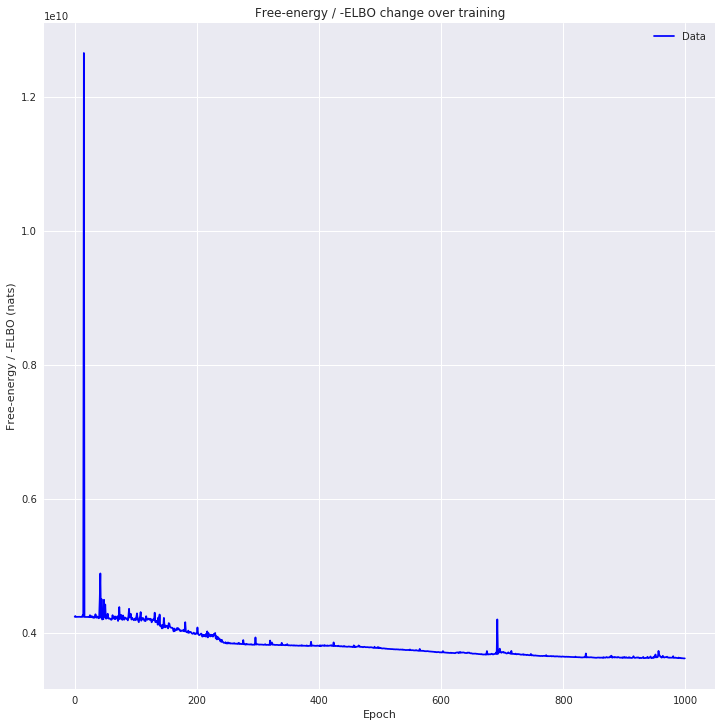

In [15]:
utils.plot_losses(losses)

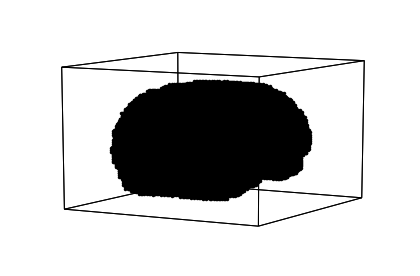

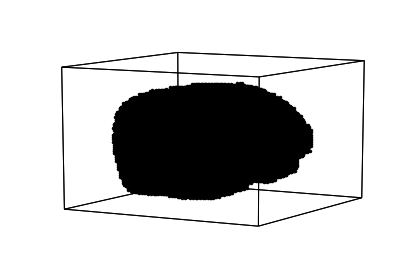

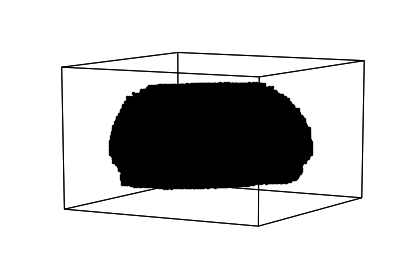

In [16]:
htfa.plot_voxels()

In [17]:
posterior_sample, q = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Posterior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

03/28/2018 11:36:54 Posterior Reconstruction Error (Frobenius Norm) for subject 0: 4.98502930e+03
03/28/2018 11:36:55 Posterior Reconstruction Error (Frobenius Norm) for subject 1: 5.01805762e+03
03/28/2018 11:36:55 Posterior Reconstruction Error (Frobenius Norm) for subject 2: 5.05643701e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x3x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x3x10]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Weights1': Normal([t

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


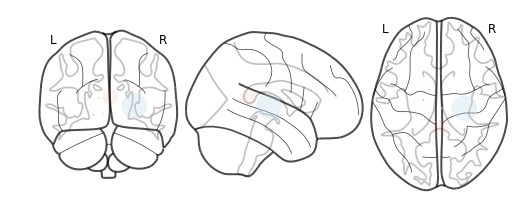

In [18]:
htfa.plot_factor_centers(trace=posterior_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


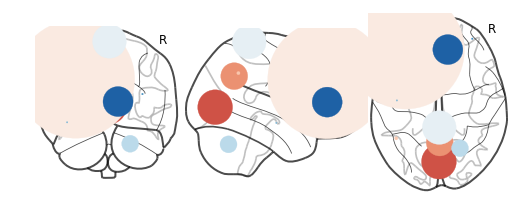

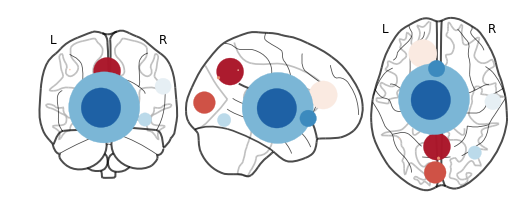

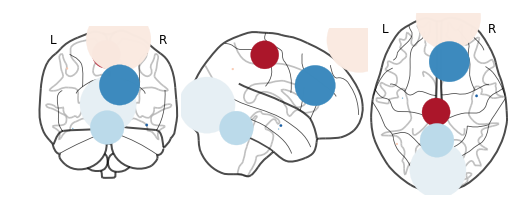

In [19]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


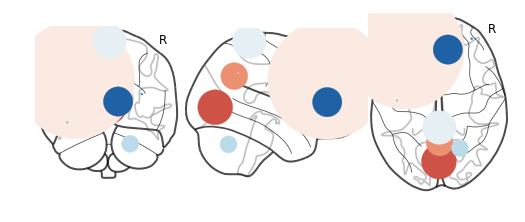

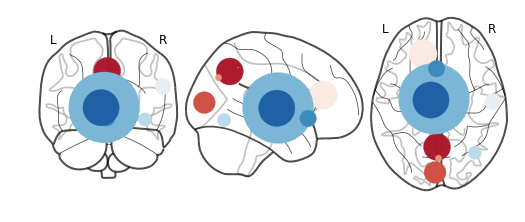

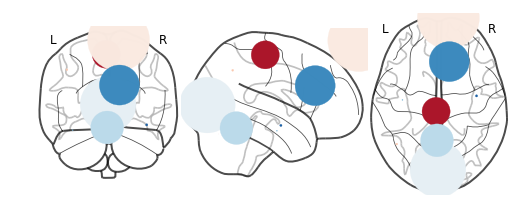

In [20]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=posterior_sample)